## Gujarathi news category classification model

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
%matplotlib inline

### Global variables

In [2]:
corpus = []

# 2100 words will be used
cv = CountVectorizer(max_features = 2100) 
tfidf_transformer = TfidfTransformer()

le = preprocessing.LabelEncoder()

### Create dataset

In [3]:
# Open text files.
business_text_file = open('../dataset/BusinessGujrathi.txt', encoding='utf-8')
tech_text_file = open('../dataset/TechnologyGujrathi.txt', encoding='utf-8')
entertainment_text_file = open('../dataset/EntertainmentGujrathi.txt', encoding='utf-8')

# Read text files.
business_text = business_text_file.read()
tech_text = tech_text_file.read()
entertainment_text = entertainment_text_file.read()

# Extract sentences.
business_sentences = business_text.split('\n')
tech_sentences = tech_text.split('\n')
entertainment_sentences = entertainment_text.split('\n')

# Filter out empty sentences.
business_sentences = list(filter(lambda x: x != '', business_sentences))
tech_sentences = list(filter(lambda x: x != '', tech_sentences))
entertainment_text = list(filter(lambda x: x != '', entertainment_text))

# Create new dataframes.
business_df = pd.DataFrame({'headline': business_sentences})
tech_df = pd.DataFrame({'headline': tech_sentences})
entertainment_df = pd.DataFrame({'headline': entertainment_text})

# Assign labels to dataframes.
business_df['label'] = 'business'
tech_df['label'] = 'tech'
entertainment_df['label'] = 'entertainment'

In [4]:
# Read gujrathi dataset.
df = pd.read_csv('../dataset/gtrain.csv')

# Create a single dataframe of all data.
df = df.append([pd.read_csv('../dataset/gvalid.csv'), business_df, entertainment_df, tech_df])

# Top 5 rows of data.
df.head()

,headline,label
0,મોદી સરકાર 1 ફેબ્રુઆરીએ વચગાળાનું બજેટ રજૂ કરશ...,business
1,LIC પોલિસી ધારકો માટે મોટી ખબર! પ્રીમિયમ જમા ક...,business
2,"VIRAL VIDEO: મસ્તમૌલા અંદાજમાં રણવીર સિંહ, ચાર...",entertainment
3,શાહરૂખની સાથે ફિલ્મમાં કામ કરી ચુક્યો છે અનુષ્...,entertainment
4,એકદમ બટરફ્લાઇ અવતારમાં જોવા મળી આ એક્ટ્રેસ,entertainment


In [5]:
# Rename columns
df.columns = ['Headline', 'Label']

# Drop duplicate data and reindex data.
df = df.drop_duplicates(subset = 'Headline', keep = 'first')
df.reset_index(inplace=True, drop=True)

# Shuffling data and reindex data.
df = df.sample(frac = 1, random_state = 16)
df.reset_index(inplace=True, drop=True) 

# Top 5 rows of final dataframe.
df.head()

,Headline,Label
0,"હવે સ્કૂલમાંથી ગુલ્લી નહીં મારી શકે બાળકો, જાણ...",tech
1,અડધી કિંમતમાં મળી રહ્યો છે ગૂગલનો આ સ્માર્ટફોન...,tech
2,"Reliance AGM: JioGigaTV, જિયોફોન-2 થયાં લોન્ચ,...",business
3,ચાર્જર અને સિમ સ્લોટ વગરનો દુનિયાનો પહેલો મોબા...,tech
4,"ભારતમાં 17 મે પર લોન્ચ થશે OnePlus 6, ખરીદ્યા...",tech


In [6]:
tech_df = df[df['Label'] == 'tech']
tech_df = tech_df.sample(frac = 0.35, random_state = 13)

business_df = df[df['Label'] == 'business']
business_df = business_df.sample(frac = 0.09, random_state = 13)

df = df.append([tech_df, business_df])

# Shuffling data and reindex data.
df = df.sample(frac = 1, random_state = 16)
df.reset_index(inplace=True, drop=True) 

print(f'Dataset contains {df.shape[0]} rows') 
df.head()

Dataset contains 8041 rows


,Headline,Label
0,"હોલિવૂડ ફિલ્મ 'ધ નન'ની રેકોર્ડ બ્રેક કમાણી, પહ...",entertainment
1,"મુન્નાભાઇમાંથી અરશદ વારસીનું પત્તુ સાફ, સર્કિટ...",entertainment
2,એક પણ રૂપિયો ચૂકવ્યા વગર દીપિકાએ ખરીદ્યા લાખોન...,entertainment
3,વર્ષો બાદ એક સાથે જોવા મળ્યા જેકી શ્રોફ અને મા...,entertainment
4,ઇન્કમ ટેક્સ ભરવાની અંતિમ તારીખ વધી,business


### Data visualisation

Text(0, 0.5, 'No of observations')

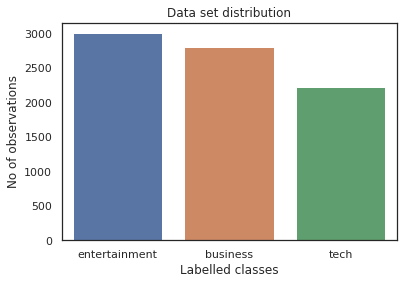

In [7]:
# No. of observation belonging to each labelled class
sns.set(style="white")
sns.set_context("notebook")
depression_class_distribution = sns.countplot(x = "Label", data = df)
plt.title('Data set distribution')
plt.xlabel('Labelled classes')
plt.ylabel('No of observations')

### Data preprocessing

In [8]:
for i in range(0, df.shape[0]):
    tweet = str(df.iloc[i, 0])
    tweet = tweet.split()
    
    # Stop-words removal
    # Place the stopwords file in nltk_data folder in the system
    tweet = [word for word in tweet if not word in set(stopwords.words('gujarathi')) and len(word)>1]
    tweet = ' '.join(tweet)
    
    corpus.append(tweet);

In [9]:
# Bag of words
X = cv.fit_transform(corpus).toarray()

# Tfidf
X = tfidf_transformer.fit_transform(X)

# Generate appropriate output labels
# This is to be done as the output labels are also string
y = df.iloc[:, 1].values
y = le.fit_transform(y)

### Data splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Model building

In [11]:
# L1 Regularized logistic regression, as this reduces changes of overfitting
clf =  LogisticRegression(max_iter = 1000, penalty='l1', solver='saga')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

### Training accuracy

In [12]:
ytrain_prediction = clf.predict(X_train)
print('Training accuracy: ', round(round(accuracy_score(y_train, ytrain_prediction), 6) * 100, 0))

Training accuracy:  85.0


### Testing accuracy

In [13]:
ytest_prediction = clf.predict(X_test)
print('Testing accuracy: ', round(round(accuracy_score(y_test, ytest_prediction), 6) * 100, 0))

Testing accuracy:  81.0


### Training set confusion matrix

In [14]:
confusion_matrix(y_train, ytrain_prediction)

array([[1734,  223,  150],
       [ 154, 2057,   42],
       [ 195,  131, 1344]])

### Testing set confusion matrix

In [15]:
confusion_matrix(y_test, ytest_prediction)

array([[537,  97,  66],
       [ 56, 679,  18],
       [ 81,  66, 411]])

### Model objects

#### Saving the objects in the picke file so that they can be used by the flask front-end

In [16]:
import pickle
file_pi = open('../objects/gujarathi-vectorizer.pickle', 'wb')
pickle.dump(cv, file_pi)
file_pi.close()

In [17]:
file_pi = open('../objects/gujarathi-encoder.pickle', 'wb')
pickle.dump(le, file_pi)
file_pi.close()

In [18]:
file_pi = open('../objects/gujarathi-tf-idf.pickle', 'wb')
pickle.dump(tfidf_transformer, file_pi)
file_pi.close()

In [19]:
file_pi = open('../objects/gujurathi-classifier.pickle', 'wb')
pickle.dump(clf, file_pi)
file_pi.close()